In [71]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import boto3
from sklearn.impute import SimpleImputer



In [72]:
#loading in data from personal s3 bucket
s3_client = boto3.client('s3', region_name='us-east-2')


bucket_name = 'harshil-storage'
file_key = 'v_dem_indicators_2024.csv'


response = s3_client.get_object(Bucket=bucket_name, Key=file_key)

indicators = pd.read_csv(response.get("Body"))

indicators


C:\Users\harsh\AppData\Local\Temp\ipykernel_12700\2457279278.py:11: DtypeWarning: Columns (364,365,366,399,415,804,836,837,924,1240,1257,1486,3094,3168,3169,3341,3342,3344,3345,3347,3350,3352) have mixed types. Specify dtype option on import or set low_memory=False.
  indicators = pd.read_csv(response.get("Body"))


,country_name,country_text_id,country_id,year,historical_date,project,historical,histname,codingstart,codingend,...,e_mipopula,e_miurbani,e_pefeliex,e_wb_pop,e_pechmor,e_miinteco,e_civil_war,e_miinterc,e_pt_coup,e_pt_coup_attempts
0,Mexico,MEX,3,1789,1789-12-31,1,1,Viceroyalty of New Spain,1789,2023,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN
1,Mexico,MEX,3,1790,1790-12-31,1,1,Viceroyalty of New Spain,1789,2023,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN
2,Mexico,MEX,3,1791,1791-12-31,1,1,Viceroyalty of New Spain,1789,2023,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN
3,Mexico,MEX,3,1792,1792-12-31,1,1,Viceroyalty of New Spain,1789,2023,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN
4,Mexico,MEX,3,1793,1793-12-31,1,1,Viceroyalty of New Spain,1789,2023,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27729,Piedmont-Sardinia,SPD,373,1857,1857-12-31,1,1,Kingdom of Piedmont-Sardinia,1789,1861,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27730,Piedmont-Sardinia,SPD,373,1858,1858-12-31,1,1,Kingdom of Piedmont-Sardinia,1789,1861,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27731,Piedmont-Sardinia,SPD,373,1859,1859-12-31,1,1,Kingdom of Piedmont-Sardinia [incorporates Lom...,1789,1861,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27732,Piedmont-Sardinia,SPD,373,1860,1860-12-31,1,1,NaN,1789,1861,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:


#dropping the columns that are not needed
indicators.drop(columns=['country_name', 'country_id', 'histname' ,'historical_date','project','historical',
                         'codingstart','codingend', 'codingstart_contemp', 'codingend_contemp',
                         'codingstart_hist', 'codingend_hist', 'gapstart1', 
                         'gapstart2', 'gapstart3', 'gapend1', 'gapend2', 'gapend3', 'gap_index',
                         'COWcode'], inplace=True)

In [74]:
indicators

,country_text_id,year,v2x_polyarchy,v2x_polyarchy_codelow,v2x_polyarchy_codehigh,v2x_polyarchy_sd,v2x_libdem,v2x_libdem_codelow,v2x_libdem_codehigh,v2x_libdem_sd,...,e_mipopula,e_miurbani,e_pefeliex,e_wb_pop,e_pechmor,e_miinteco,e_civil_war,e_miinterc,e_pt_coup,e_pt_coup_attempts
0,MEX,1789,0.028,0.017,0.037,0.011,0.045,0.030,0.058,0.015,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN
1,MEX,1790,0.028,0.017,0.037,0.011,0.045,0.030,0.058,0.015,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN
2,MEX,1791,0.028,0.017,0.037,0.011,0.045,0.030,0.058,0.015,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN
3,MEX,1792,0.028,0.017,0.037,0.011,0.045,0.030,0.058,0.015,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN
4,MEX,1793,0.028,0.017,0.037,0.011,0.045,0.030,0.058,0.015,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27729,SPD,1857,0.206,0.179,0.234,0.028,0.134,0.107,0.154,0.024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27730,SPD,1858,0.207,0.188,0.242,0.027,0.135,0.111,0.158,0.024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27731,SPD,1859,0.207,0.188,0.242,0.027,0.135,0.111,0.158,0.024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27732,SPD,1860,0.212,0.184,0.240,0.028,0.136,0.114,0.162,0.024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
#removing years before 1980
indicators = indicators[indicators.year >= 1980]

In [76]:
#sorting the data by country and year
indicators = indicators.sort_values(by=['country_text_id', 'year'])

In [77]:
#creating a copy of the data with only the year 2023
indicators_2023 = indicators[indicators.year == 2023]


In [78]:
indicators_2023

,country_text_id,year,v2x_polyarchy,v2x_polyarchy_codelow,v2x_polyarchy_codehigh,v2x_polyarchy_sd,v2x_libdem,v2x_libdem_codelow,v2x_libdem_codehigh,v2x_libdem_sd,...,e_mipopula,e_miurbani,e_pefeliex,e_wb_pop,e_pechmor,e_miinteco,e_civil_war,e_miinterc,e_pt_coup,e_pt_coup_attempts
5525,AFG,2023,0.075,0.069,0.079,0.006,0.030,0.017,0.039,0.011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16044,AGO,2023,0.349,0.308,0.386,0.042,0.173,0.145,0.201,0.029,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1882,ALB,2023,0.510,0.435,0.559,0.061,0.402,0.353,0.449,0.050,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25900,ARE,2023,0.102,0.084,0.119,0.017,0.078,0.062,0.093,0.016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5760,ARG,2023,0.840,0.802,0.894,0.049,0.690,0.638,0.750,0.057,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2285,YEM,2023,0.130,0.116,0.146,0.015,0.048,0.035,0.059,0.013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1065,ZAF,2023,0.687,0.625,0.750,0.062,0.584,0.527,0.643,0.058,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9297,ZMB,2023,0.529,0.453,0.580,0.063,0.424,0.375,0.478,0.052,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9421,ZWE,2023,0.288,0.259,0.319,0.031,0.174,0.150,0.200,0.025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
#moving e_civil_war to the right of country_text_id and year

civil_war = indicators['e_civil_war']
indicators.drop(columns=['e_civil_war'], inplace=True)
indicators.insert(2, 'e_civil_war', civil_war)

In [80]:
indicators

,country_text_id,year,e_civil_war,v2x_polyarchy,v2x_polyarchy_codelow,v2x_polyarchy_codehigh,v2x_polyarchy_sd,v2x_libdem,v2x_libdem_codelow,v2x_libdem_codehigh,...,e_miurbpop,e_mipopula,e_miurbani,e_pefeliex,e_wb_pop,e_pechmor,e_miinteco,e_miinterc,e_pt_coup,e_pt_coup_attempts
5482,AFG,1980,1.0,0.082,0.075,0.088,0.007,0.045,0.032,0.059,...,3397.0,15112.150,0.225,39.010,13356500.0,244.0,0.0,1.0,0.0,0.0
5483,AFG,1981,1.0,0.083,0.075,0.089,0.007,0.047,0.033,0.060,...,3473.0,15067.869,0.230,39.336,13171679.0,238.0,0.0,1.0,0.0,0.0
5484,AFG,1982,1.0,0.082,0.075,0.088,0.007,0.048,0.033,0.061,...,3549.0,15023.588,0.236,39.662,12882518.0,231.0,0.0,1.0,0.0,0.0
5485,AFG,1983,1.0,0.083,0.075,0.089,0.008,0.048,0.031,0.059,...,3625.0,14979.307,0.242,39.988,12537732.0,225.0,0.0,1.0,0.0,0.0
5486,AFG,1984,1.0,0.083,0.075,0.089,0.008,0.048,0.032,0.060,...,3701.0,14935.026,0.248,40.314,12204306.0,218.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26330,ZZB,2019,NaN,0.265,0.233,0.285,0.027,0.211,0.187,0.236,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26331,ZZB,2020,NaN,0.262,0.235,0.288,0.027,0.207,0.180,0.229,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26332,ZZB,2021,NaN,0.273,0.244,0.299,0.030,0.220,0.193,0.243,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26333,ZZB,2022,NaN,0.284,0.254,0.310,0.030,0.229,0.204,0.255,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
#dropping rows with empty values
indicators = indicators.dropna(subset=['e_civil_war'])

In [82]:

indicators

,country_text_id,year,e_civil_war,v2x_polyarchy,v2x_polyarchy_codelow,v2x_polyarchy_codehigh,v2x_polyarchy_sd,v2x_libdem,v2x_libdem_codelow,v2x_libdem_codehigh,...,e_miurbpop,e_mipopula,e_miurbani,e_pefeliex,e_wb_pop,e_pechmor,e_miinteco,e_miinterc,e_pt_coup,e_pt_coup_attempts
5482,AFG,1980,1.0,0.082,0.075,0.088,0.007,0.045,0.032,0.059,...,3397.0,15112.150,0.225,39.010,13356500.0,244.0,0.0,1.0,0.0,0.0
5483,AFG,1981,1.0,0.083,0.075,0.089,0.007,0.047,0.033,0.060,...,3473.0,15067.869,0.230,39.336,13171679.0,238.0,0.0,1.0,0.0,0.0
5484,AFG,1982,1.0,0.082,0.075,0.088,0.007,0.048,0.033,0.061,...,3549.0,15023.588,0.236,39.662,12882518.0,231.0,0.0,1.0,0.0,0.0
5485,AFG,1983,1.0,0.083,0.075,0.089,0.008,0.048,0.031,0.059,...,3625.0,14979.307,0.242,39.988,12537732.0,225.0,0.0,1.0,0.0,0.0
5486,AFG,1984,1.0,0.083,0.075,0.089,0.008,0.048,0.032,0.060,...,3701.0,14935.026,0.248,40.314,12204306.0,218.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9400,ZWE,2002,0.0,0.266,0.240,0.288,0.025,0.167,0.138,0.187,...,NaN,NaN,NaN,NaN,11954293.0,103.0,NaN,NaN,0.0,0.0
9401,ZWE,2003,0.0,0.265,0.239,0.287,0.025,0.156,0.133,0.179,...,NaN,NaN,NaN,NaN,11982219.0,102.0,NaN,NaN,0.0,0.0
9402,ZWE,2004,0.0,0.252,0.226,0.268,0.023,0.152,0.129,0.174,...,NaN,NaN,NaN,NaN,12019911.0,102.0,NaN,NaN,0.0,0.0
9403,ZWE,2005,0.0,0.251,0.228,0.269,0.021,0.151,0.129,0.174,...,NaN,NaN,NaN,NaN,12076697.0,101.0,NaN,NaN,0.0,0.0


In [83]:
#dropping columns with na values
indicators = indicators.dropna(thresh = indicators.shape[0]*0.95, axis=1)

In [84]:
indicators

,country_text_id,year,e_civil_war,v2x_polyarchy,v2x_polyarchy_codelow,v2x_polyarchy_codehigh,v2x_polyarchy_sd,v2x_libdem,v2x_libdem_codelow,v2x_libdem_codehigh,...,e_pop_sd,e_total_resources_income_pc,e_total_oil_income_pc,e_total_fuel_income_pc,e_pelifeex,e_miferrat,e_wb_pop,e_pechmor,e_pt_coup,e_pt_coup_attempts
5482,AFG,1980,1.0,0.082,0.075,0.088,0.007,0.045,0.032,0.059,...,43.689,17.982,0.0,17.982,43.7,7.45,13356500.0,244.0,0.0,0.0
5483,AFG,1981,1.0,0.083,0.075,0.089,0.007,0.047,0.033,0.060,...,43.485,26.813,0.0,26.813,44.3,7.45,13171679.0,238.0,0.0,0.0
5484,AFG,1982,1.0,0.082,0.075,0.088,0.007,0.048,0.033,0.061,...,41.887,32.989,0.0,32.989,44.1,7.45,12882518.0,231.0,0.0,0.0
5485,AFG,1983,1.0,0.083,0.075,0.089,0.008,0.048,0.031,0.059,...,38.894,36.112,0.0,36.112,42.3,7.45,12537732.0,225.0,0.0,0.0
5486,AFG,1984,1.0,0.083,0.075,0.089,0.008,0.048,0.032,0.060,...,39.007,35.757,0.0,35.757,39.9,7.46,12204306.0,218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9400,ZWE,2002,0.0,0.266,0.240,0.288,0.025,0.167,0.138,0.187,...,29.762,51.054,0.0,10.477,46.6,3.72,11954293.0,103.0,0.0,0.0
9401,ZWE,2003,0.0,0.265,0.239,0.287,0.025,0.156,0.133,0.179,...,29.892,50.841,0.0,9.111,46.4,3.73,11982219.0,102.0,0.0,0.0
9402,ZWE,2004,0.0,0.252,0.226,0.268,0.023,0.152,0.129,0.174,...,32.244,76.277,0.0,9.696,46.4,3.74,12019911.0,102.0,0.0,0.0
9403,ZWE,2005,0.0,0.251,0.228,0.269,0.021,0.151,0.129,0.174,...,33.799,69.183,0.0,11.886,46.8,3.77,12076697.0,101.0,0.0,0.0


In [85]:
#dropping columns with codelow or codehigh in name
indicators = indicators[indicators.columns.drop(list(indicators.filter(regex='codelow')))]
indicators = indicators[indicators.columns.drop(list(indicators.filter(regex='codehigh')))]

In [86]:
indicators

,country_text_id,year,e_civil_war,v2x_polyarchy,v2x_polyarchy_sd,v2x_libdem,v2x_libdem_sd,v2x_partipdem,v2x_partipdem_sd,v2x_delibdem,...,e_pop_sd,e_total_resources_income_pc,e_total_oil_income_pc,e_total_fuel_income_pc,e_pelifeex,e_miferrat,e_wb_pop,e_pechmor,e_pt_coup,e_pt_coup_attempts
5482,AFG,1980,1.0,0.082,0.007,0.045,0.014,0.023,0.012,0.025,...,43.689,17.982,0.0,17.982,43.7,7.45,13356500.0,244.0,0.0,0.0
5483,AFG,1981,1.0,0.083,0.007,0.047,0.014,0.023,0.012,0.029,...,43.485,26.813,0.0,26.813,44.3,7.45,13171679.0,238.0,0.0,0.0
5484,AFG,1982,1.0,0.082,0.007,0.048,0.014,0.023,0.012,0.029,...,41.887,32.989,0.0,32.989,44.1,7.45,12882518.0,231.0,0.0,0.0
5485,AFG,1983,1.0,0.083,0.008,0.048,0.014,0.023,0.012,0.029,...,38.894,36.112,0.0,36.112,42.3,7.45,12537732.0,225.0,0.0,0.0
5486,AFG,1984,1.0,0.083,0.008,0.048,0.014,0.023,0.012,0.029,...,39.007,35.757,0.0,35.757,39.9,7.46,12204306.0,218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9400,ZWE,2002,0.0,0.266,0.025,0.167,0.024,0.223,0.018,0.188,...,29.762,51.054,0.0,10.477,46.6,3.72,11954293.0,103.0,0.0,0.0
9401,ZWE,2003,0.0,0.265,0.025,0.156,0.024,0.219,0.019,0.187,...,29.892,50.841,0.0,9.111,46.4,3.73,11982219.0,102.0,0.0,0.0
9402,ZWE,2004,0.0,0.252,0.023,0.152,0.023,0.214,0.018,0.183,...,32.244,76.277,0.0,9.696,46.4,3.74,12019911.0,102.0,0.0,0.0
9403,ZWE,2005,0.0,0.251,0.021,0.151,0.023,0.210,0.017,0.183,...,33.799,69.183,0.0,11.886,46.8,3.77,12076697.0,101.0,0.0,0.0


In [87]:
#dropping columns with sd in name
indicators = indicators[indicators.columns.drop(list(indicators.filter(regex='sd')))]

In [88]:
indicators

,country_text_id,year,e_civil_war,v2x_polyarchy,v2x_libdem,v2x_partipdem,v2x_delibdem,v2x_egaldem,v2x_api,v2x_mpi,...,e_pop,e_total_resources_income_pc,e_total_oil_income_pc,e_total_fuel_income_pc,e_pelifeex,e_miferrat,e_wb_pop,e_pechmor,e_pt_coup,e_pt_coup_attempts
5482,AFG,1980,1.0,0.082,0.045,0.023,0.025,0.114,0.164,0.000,...,1476.904,17.982,0.0,17.982,43.7,7.45,13356500.0,244.0,0.0,0.0
5483,AFG,1981,1.0,0.083,0.047,0.023,0.029,0.115,0.166,0.000,...,1430.385,26.813,0.0,26.813,44.3,7.45,13171679.0,238.0,0.0,0.0
5484,AFG,1982,1.0,0.082,0.048,0.023,0.029,0.115,0.165,0.000,...,1382.088,32.989,0.0,32.989,44.1,7.45,12882518.0,231.0,0.0,0.0
5485,AFG,1983,1.0,0.083,0.048,0.023,0.029,0.115,0.166,0.000,...,1352.651,36.112,0.0,36.112,42.3,7.45,12537732.0,225.0,0.0,0.0
5486,AFG,1984,1.0,0.083,0.048,0.023,0.029,0.115,0.165,0.000,...,1339.467,35.757,0.0,35.757,39.9,7.46,12204306.0,218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9400,ZWE,2002,0.0,0.266,0.167,0.223,0.188,0.161,0.514,0.017,...,1304.472,51.054,0.0,10.477,46.6,3.72,11954293.0,103.0,0.0,0.0
9401,ZWE,2003,0.0,0.265,0.156,0.219,0.187,0.151,0.514,0.016,...,1294.554,50.841,0.0,9.111,46.4,3.73,11982219.0,102.0,0.0,0.0
9402,ZWE,2004,0.0,0.252,0.152,0.214,0.183,0.146,0.490,0.012,...,1294.754,76.277,0.0,9.696,46.4,3.74,12019911.0,102.0,0.0,0.0
9403,ZWE,2005,0.0,0.251,0.151,0.210,0.183,0.167,0.490,0.011,...,1297.543,69.183,0.0,11.886,46.8,3.77,12076697.0,101.0,0.0,0.0


In [89]:
#dropping columns with ord in name
indicators = indicators[indicators.columns.drop(list(indicators.filter(regex='ord')))]

In [90]:
indicators

,country_text_id,year,e_civil_war,v2x_polyarchy,v2x_libdem,v2x_partipdem,v2x_delibdem,v2x_egaldem,v2x_api,v2x_mpi,...,e_pop,e_total_resources_income_pc,e_total_oil_income_pc,e_total_fuel_income_pc,e_pelifeex,e_miferrat,e_wb_pop,e_pechmor,e_pt_coup,e_pt_coup_attempts
5482,AFG,1980,1.0,0.082,0.045,0.023,0.025,0.114,0.164,0.000,...,1476.904,17.982,0.0,17.982,43.7,7.45,13356500.0,244.0,0.0,0.0
5483,AFG,1981,1.0,0.083,0.047,0.023,0.029,0.115,0.166,0.000,...,1430.385,26.813,0.0,26.813,44.3,7.45,13171679.0,238.0,0.0,0.0
5484,AFG,1982,1.0,0.082,0.048,0.023,0.029,0.115,0.165,0.000,...,1382.088,32.989,0.0,32.989,44.1,7.45,12882518.0,231.0,0.0,0.0
5485,AFG,1983,1.0,0.083,0.048,0.023,0.029,0.115,0.166,0.000,...,1352.651,36.112,0.0,36.112,42.3,7.45,12537732.0,225.0,0.0,0.0
5486,AFG,1984,1.0,0.083,0.048,0.023,0.029,0.115,0.165,0.000,...,1339.467,35.757,0.0,35.757,39.9,7.46,12204306.0,218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9400,ZWE,2002,0.0,0.266,0.167,0.223,0.188,0.161,0.514,0.017,...,1304.472,51.054,0.0,10.477,46.6,3.72,11954293.0,103.0,0.0,0.0
9401,ZWE,2003,0.0,0.265,0.156,0.219,0.187,0.151,0.514,0.016,...,1294.554,50.841,0.0,9.111,46.4,3.73,11982219.0,102.0,0.0,0.0
9402,ZWE,2004,0.0,0.252,0.152,0.214,0.183,0.146,0.490,0.012,...,1294.754,76.277,0.0,9.696,46.4,3.74,12019911.0,102.0,0.0,0.0
9403,ZWE,2005,0.0,0.251,0.151,0.210,0.183,0.167,0.490,0.011,...,1297.543,69.183,0.0,11.886,46.8,3.77,12076697.0,101.0,0.0,0.0


In [91]:
#dropping columns with mean in name
indicators = indicators[indicators.columns.drop(list(indicators.filter(regex='mean')))]

In [92]:
indicators

,country_text_id,year,e_civil_war,v2x_polyarchy,v2x_libdem,v2x_partipdem,v2x_delibdem,v2x_egaldem,v2x_api,v2x_mpi,...,e_pop,e_total_resources_income_pc,e_total_oil_income_pc,e_total_fuel_income_pc,e_pelifeex,e_miferrat,e_wb_pop,e_pechmor,e_pt_coup,e_pt_coup_attempts
5482,AFG,1980,1.0,0.082,0.045,0.023,0.025,0.114,0.164,0.000,...,1476.904,17.982,0.0,17.982,43.7,7.45,13356500.0,244.0,0.0,0.0
5483,AFG,1981,1.0,0.083,0.047,0.023,0.029,0.115,0.166,0.000,...,1430.385,26.813,0.0,26.813,44.3,7.45,13171679.0,238.0,0.0,0.0
5484,AFG,1982,1.0,0.082,0.048,0.023,0.029,0.115,0.165,0.000,...,1382.088,32.989,0.0,32.989,44.1,7.45,12882518.0,231.0,0.0,0.0
5485,AFG,1983,1.0,0.083,0.048,0.023,0.029,0.115,0.166,0.000,...,1352.651,36.112,0.0,36.112,42.3,7.45,12537732.0,225.0,0.0,0.0
5486,AFG,1984,1.0,0.083,0.048,0.023,0.029,0.115,0.165,0.000,...,1339.467,35.757,0.0,35.757,39.9,7.46,12204306.0,218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9400,ZWE,2002,0.0,0.266,0.167,0.223,0.188,0.161,0.514,0.017,...,1304.472,51.054,0.0,10.477,46.6,3.72,11954293.0,103.0,0.0,0.0
9401,ZWE,2003,0.0,0.265,0.156,0.219,0.187,0.151,0.514,0.016,...,1294.554,50.841,0.0,9.111,46.4,3.73,11982219.0,102.0,0.0,0.0
9402,ZWE,2004,0.0,0.252,0.152,0.214,0.183,0.146,0.490,0.012,...,1294.754,76.277,0.0,9.696,46.4,3.74,12019911.0,102.0,0.0,0.0
9403,ZWE,2005,0.0,0.251,0.151,0.210,0.183,0.167,0.490,0.011,...,1297.543,69.183,0.0,11.886,46.8,3.77,12076697.0,101.0,0.0,0.0


In [93]:
#dropping columns with osp in name
indicators = indicators[indicators.columns.drop(list(indicators.filter(regex='osp')))]

In [94]:
indicators

,country_text_id,year,e_civil_war,v2x_polyarchy,v2x_libdem,v2x_partipdem,v2x_delibdem,v2x_egaldem,v2x_api,v2x_mpi,...,e_pop,e_total_resources_income_pc,e_total_oil_income_pc,e_total_fuel_income_pc,e_pelifeex,e_miferrat,e_wb_pop,e_pechmor,e_pt_coup,e_pt_coup_attempts
5482,AFG,1980,1.0,0.082,0.045,0.023,0.025,0.114,0.164,0.000,...,1476.904,17.982,0.0,17.982,43.7,7.45,13356500.0,244.0,0.0,0.0
5483,AFG,1981,1.0,0.083,0.047,0.023,0.029,0.115,0.166,0.000,...,1430.385,26.813,0.0,26.813,44.3,7.45,13171679.0,238.0,0.0,0.0
5484,AFG,1982,1.0,0.082,0.048,0.023,0.029,0.115,0.165,0.000,...,1382.088,32.989,0.0,32.989,44.1,7.45,12882518.0,231.0,0.0,0.0
5485,AFG,1983,1.0,0.083,0.048,0.023,0.029,0.115,0.166,0.000,...,1352.651,36.112,0.0,36.112,42.3,7.45,12537732.0,225.0,0.0,0.0
5486,AFG,1984,1.0,0.083,0.048,0.023,0.029,0.115,0.165,0.000,...,1339.467,35.757,0.0,35.757,39.9,7.46,12204306.0,218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9400,ZWE,2002,0.0,0.266,0.167,0.223,0.188,0.161,0.514,0.017,...,1304.472,51.054,0.0,10.477,46.6,3.72,11954293.0,103.0,0.0,0.0
9401,ZWE,2003,0.0,0.265,0.156,0.219,0.187,0.151,0.514,0.016,...,1294.554,50.841,0.0,9.111,46.4,3.73,11982219.0,102.0,0.0,0.0
9402,ZWE,2004,0.0,0.252,0.152,0.214,0.183,0.146,0.490,0.012,...,1294.754,76.277,0.0,9.696,46.4,3.74,12019911.0,102.0,0.0,0.0
9403,ZWE,2005,0.0,0.251,0.151,0.210,0.183,0.167,0.490,0.011,...,1297.543,69.183,0.0,11.886,46.8,3.77,12076697.0,101.0,0.0,0.0


In [95]:
"""
#if column has nr in name, subset drop with this column and drop rows with a value of 3 or less at this column

#getting list of columns with nr in name
nr_columns = list(indicators.filter(regex='nr'))

#getting subset of nr columns
nr_indicators = indicators[nr_columns]

#replacing values less than 3 with NaN
nr_indicators.replace({3:None}, inplace=True)


copy_indicators = indicators.copy()
copy_indicators
"""

"\n#if column has nr in name, subset drop with this column and drop rows with a value of 3 or less at this column\n\n#getting list of columns with nr in name\nnr_columns = list(indicators.filter(regex='nr'))\n\n#getting subset of nr columns\nnr_indicators = indicators[nr_columns]\n\n#replacing values less than 3 with NaN\nnr_indicators.replace({3:None}, inplace=True)\n\n\ncopy_indicators = indicators.copy()\ncopy_indicators\n"

In [96]:
"""
#dropping rows with NaN
nr_indicators.dropna(thresh = 0.2, axis=0, inplace=True)

#only selecting rows that are in the nr_indicators
indicators = indicators[indicators.index.isin(nr_indicators.index)]

indicators
"""

'\n#dropping rows with NaN\nnr_indicators.dropna(thresh = 0.2, axis=0, inplace=True)\n\n#only selecting rows that are in the nr_indicators\nindicators = indicators[indicators.index.isin(nr_indicators.index)]\n\nindicators\n'

In [97]:
indicators

,country_text_id,year,e_civil_war,v2x_polyarchy,v2x_libdem,v2x_partipdem,v2x_delibdem,v2x_egaldem,v2x_api,v2x_mpi,...,e_pop,e_total_resources_income_pc,e_total_oil_income_pc,e_total_fuel_income_pc,e_pelifeex,e_miferrat,e_wb_pop,e_pechmor,e_pt_coup,e_pt_coup_attempts
5482,AFG,1980,1.0,0.082,0.045,0.023,0.025,0.114,0.164,0.000,...,1476.904,17.982,0.0,17.982,43.7,7.45,13356500.0,244.0,0.0,0.0
5483,AFG,1981,1.0,0.083,0.047,0.023,0.029,0.115,0.166,0.000,...,1430.385,26.813,0.0,26.813,44.3,7.45,13171679.0,238.0,0.0,0.0
5484,AFG,1982,1.0,0.082,0.048,0.023,0.029,0.115,0.165,0.000,...,1382.088,32.989,0.0,32.989,44.1,7.45,12882518.0,231.0,0.0,0.0
5485,AFG,1983,1.0,0.083,0.048,0.023,0.029,0.115,0.166,0.000,...,1352.651,36.112,0.0,36.112,42.3,7.45,12537732.0,225.0,0.0,0.0
5486,AFG,1984,1.0,0.083,0.048,0.023,0.029,0.115,0.165,0.000,...,1339.467,35.757,0.0,35.757,39.9,7.46,12204306.0,218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9400,ZWE,2002,0.0,0.266,0.167,0.223,0.188,0.161,0.514,0.017,...,1304.472,51.054,0.0,10.477,46.6,3.72,11954293.0,103.0,0.0,0.0
9401,ZWE,2003,0.0,0.265,0.156,0.219,0.187,0.151,0.514,0.016,...,1294.554,50.841,0.0,9.111,46.4,3.73,11982219.0,102.0,0.0,0.0
9402,ZWE,2004,0.0,0.252,0.152,0.214,0.183,0.146,0.490,0.012,...,1294.754,76.277,0.0,9.696,46.4,3.74,12019911.0,102.0,0.0,0.0
9403,ZWE,2005,0.0,0.251,0.151,0.210,0.183,0.167,0.490,0.011,...,1297.543,69.183,0.0,11.886,46.8,3.77,12076697.0,101.0,0.0,0.0


In [98]:
#dropping columns with nr in name
indicators = indicators[indicators.columns.drop(list(indicators.filter(regex='nr')))]

In [99]:
indicators

,country_text_id,year,e_civil_war,v2x_polyarchy,v2x_libdem,v2x_partipdem,v2x_delibdem,v2x_egaldem,v2x_api,v2x_mpi,...,e_pop,e_total_resources_income_pc,e_total_oil_income_pc,e_total_fuel_income_pc,e_pelifeex,e_miferrat,e_wb_pop,e_pechmor,e_pt_coup,e_pt_coup_attempts
5482,AFG,1980,1.0,0.082,0.045,0.023,0.025,0.114,0.164,0.000,...,1476.904,17.982,0.0,17.982,43.7,7.45,13356500.0,244.0,0.0,0.0
5483,AFG,1981,1.0,0.083,0.047,0.023,0.029,0.115,0.166,0.000,...,1430.385,26.813,0.0,26.813,44.3,7.45,13171679.0,238.0,0.0,0.0
5484,AFG,1982,1.0,0.082,0.048,0.023,0.029,0.115,0.165,0.000,...,1382.088,32.989,0.0,32.989,44.1,7.45,12882518.0,231.0,0.0,0.0
5485,AFG,1983,1.0,0.083,0.048,0.023,0.029,0.115,0.166,0.000,...,1352.651,36.112,0.0,36.112,42.3,7.45,12537732.0,225.0,0.0,0.0
5486,AFG,1984,1.0,0.083,0.048,0.023,0.029,0.115,0.165,0.000,...,1339.467,35.757,0.0,35.757,39.9,7.46,12204306.0,218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9400,ZWE,2002,0.0,0.266,0.167,0.223,0.188,0.161,0.514,0.017,...,1304.472,51.054,0.0,10.477,46.6,3.72,11954293.0,103.0,0.0,0.0
9401,ZWE,2003,0.0,0.265,0.156,0.219,0.187,0.151,0.514,0.016,...,1294.554,50.841,0.0,9.111,46.4,3.73,11982219.0,102.0,0.0,0.0
9402,ZWE,2004,0.0,0.252,0.152,0.214,0.183,0.146,0.490,0.012,...,1294.754,76.277,0.0,9.696,46.4,3.74,12019911.0,102.0,0.0,0.0
9403,ZWE,2005,0.0,0.251,0.151,0.210,0.183,0.167,0.490,0.011,...,1297.543,69.183,0.0,11.886,46.8,3.77,12076697.0,101.0,0.0,0.0


In [100]:
#dropping columns with e_v2x in name
indicators = indicators[indicators.columns.drop(list(indicators.filter(regex='e_v2x')))]

In [101]:
indicators

,country_text_id,year,e_civil_war,v2x_polyarchy,v2x_libdem,v2x_partipdem,v2x_delibdem,v2x_egaldem,v2x_api,v2x_mpi,...,e_pop,e_total_resources_income_pc,e_total_oil_income_pc,e_total_fuel_income_pc,e_pelifeex,e_miferrat,e_wb_pop,e_pechmor,e_pt_coup,e_pt_coup_attempts
5482,AFG,1980,1.0,0.082,0.045,0.023,0.025,0.114,0.164,0.000,...,1476.904,17.982,0.0,17.982,43.7,7.45,13356500.0,244.0,0.0,0.0
5483,AFG,1981,1.0,0.083,0.047,0.023,0.029,0.115,0.166,0.000,...,1430.385,26.813,0.0,26.813,44.3,7.45,13171679.0,238.0,0.0,0.0
5484,AFG,1982,1.0,0.082,0.048,0.023,0.029,0.115,0.165,0.000,...,1382.088,32.989,0.0,32.989,44.1,7.45,12882518.0,231.0,0.0,0.0
5485,AFG,1983,1.0,0.083,0.048,0.023,0.029,0.115,0.166,0.000,...,1352.651,36.112,0.0,36.112,42.3,7.45,12537732.0,225.0,0.0,0.0
5486,AFG,1984,1.0,0.083,0.048,0.023,0.029,0.115,0.165,0.000,...,1339.467,35.757,0.0,35.757,39.9,7.46,12204306.0,218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9400,ZWE,2002,0.0,0.266,0.167,0.223,0.188,0.161,0.514,0.017,...,1304.472,51.054,0.0,10.477,46.6,3.72,11954293.0,103.0,0.0,0.0
9401,ZWE,2003,0.0,0.265,0.156,0.219,0.187,0.151,0.514,0.016,...,1294.554,50.841,0.0,9.111,46.4,3.73,11982219.0,102.0,0.0,0.0
9402,ZWE,2004,0.0,0.252,0.152,0.214,0.183,0.146,0.490,0.012,...,1294.754,76.277,0.0,9.696,46.4,3.74,12019911.0,102.0,0.0,0.0
9403,ZWE,2005,0.0,0.251,0.151,0.210,0.183,0.167,0.490,0.011,...,1297.543,69.183,0.0,11.886,46.8,3.77,12076697.0,101.0,0.0,0.0


In [102]:
#removing columns that end with a number
indicators = indicators[indicators.columns.drop(list(indicators.filter(regex='\d+$')))]

In [103]:
indicators

,country_text_id,year,e_civil_war,v2x_polyarchy,v2x_libdem,v2x_partipdem,v2x_delibdem,v2x_egaldem,v2x_api,v2x_mpi,...,e_pop,e_total_resources_income_pc,e_total_oil_income_pc,e_total_fuel_income_pc,e_pelifeex,e_miferrat,e_wb_pop,e_pechmor,e_pt_coup,e_pt_coup_attempts
5482,AFG,1980,1.0,0.082,0.045,0.023,0.025,0.114,0.164,0.000,...,1476.904,17.982,0.0,17.982,43.7,7.45,13356500.0,244.0,0.0,0.0
5483,AFG,1981,1.0,0.083,0.047,0.023,0.029,0.115,0.166,0.000,...,1430.385,26.813,0.0,26.813,44.3,7.45,13171679.0,238.0,0.0,0.0
5484,AFG,1982,1.0,0.082,0.048,0.023,0.029,0.115,0.165,0.000,...,1382.088,32.989,0.0,32.989,44.1,7.45,12882518.0,231.0,0.0,0.0
5485,AFG,1983,1.0,0.083,0.048,0.023,0.029,0.115,0.166,0.000,...,1352.651,36.112,0.0,36.112,42.3,7.45,12537732.0,225.0,0.0,0.0
5486,AFG,1984,1.0,0.083,0.048,0.023,0.029,0.115,0.165,0.000,...,1339.467,35.757,0.0,35.757,39.9,7.46,12204306.0,218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9400,ZWE,2002,0.0,0.266,0.167,0.223,0.188,0.161,0.514,0.017,...,1304.472,51.054,0.0,10.477,46.6,3.72,11954293.0,103.0,0.0,0.0
9401,ZWE,2003,0.0,0.265,0.156,0.219,0.187,0.151,0.514,0.016,...,1294.554,50.841,0.0,9.111,46.4,3.73,11982219.0,102.0,0.0,0.0
9402,ZWE,2004,0.0,0.252,0.152,0.214,0.183,0.146,0.490,0.012,...,1294.754,76.277,0.0,9.696,46.4,3.74,12019911.0,102.0,0.0,0.0
9403,ZWE,2005,0.0,0.251,0.151,0.210,0.183,0.167,0.490,0.011,...,1297.543,69.183,0.0,11.886,46.8,3.77,12076697.0,101.0,0.0,0.0


In [104]:
#removing columns that have the word region
indicators = indicators[indicators.columns.drop(list(indicators.filter(regex='region')))]

In [105]:
indicators

,country_text_id,year,e_civil_war,v2x_polyarchy,v2x_libdem,v2x_partipdem,v2x_delibdem,v2x_egaldem,v2x_api,v2x_mpi,...,e_pop,e_total_resources_income_pc,e_total_oil_income_pc,e_total_fuel_income_pc,e_pelifeex,e_miferrat,e_wb_pop,e_pechmor,e_pt_coup,e_pt_coup_attempts
5482,AFG,1980,1.0,0.082,0.045,0.023,0.025,0.114,0.164,0.000,...,1476.904,17.982,0.0,17.982,43.7,7.45,13356500.0,244.0,0.0,0.0
5483,AFG,1981,1.0,0.083,0.047,0.023,0.029,0.115,0.166,0.000,...,1430.385,26.813,0.0,26.813,44.3,7.45,13171679.0,238.0,0.0,0.0
5484,AFG,1982,1.0,0.082,0.048,0.023,0.029,0.115,0.165,0.000,...,1382.088,32.989,0.0,32.989,44.1,7.45,12882518.0,231.0,0.0,0.0
5485,AFG,1983,1.0,0.083,0.048,0.023,0.029,0.115,0.166,0.000,...,1352.651,36.112,0.0,36.112,42.3,7.45,12537732.0,225.0,0.0,0.0
5486,AFG,1984,1.0,0.083,0.048,0.023,0.029,0.115,0.165,0.000,...,1339.467,35.757,0.0,35.757,39.9,7.46,12204306.0,218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9400,ZWE,2002,0.0,0.266,0.167,0.223,0.188,0.161,0.514,0.017,...,1304.472,51.054,0.0,10.477,46.6,3.72,11954293.0,103.0,0.0,0.0
9401,ZWE,2003,0.0,0.265,0.156,0.219,0.187,0.151,0.514,0.016,...,1294.554,50.841,0.0,9.111,46.4,3.73,11982219.0,102.0,0.0,0.0
9402,ZWE,2004,0.0,0.252,0.152,0.214,0.183,0.146,0.490,0.012,...,1294.754,76.277,0.0,9.696,46.4,3.74,12019911.0,102.0,0.0,0.0
9403,ZWE,2005,0.0,0.251,0.151,0.210,0.183,0.167,0.490,0.011,...,1297.543,69.183,0.0,11.886,46.8,3.77,12076697.0,101.0,0.0,0.0


In [106]:
indicators

,country_text_id,year,e_civil_war,v2x_polyarchy,v2x_libdem,v2x_partipdem,v2x_delibdem,v2x_egaldem,v2x_api,v2x_mpi,...,e_pop,e_total_resources_income_pc,e_total_oil_income_pc,e_total_fuel_income_pc,e_pelifeex,e_miferrat,e_wb_pop,e_pechmor,e_pt_coup,e_pt_coup_attempts
5482,AFG,1980,1.0,0.082,0.045,0.023,0.025,0.114,0.164,0.000,...,1476.904,17.982,0.0,17.982,43.7,7.45,13356500.0,244.0,0.0,0.0
5483,AFG,1981,1.0,0.083,0.047,0.023,0.029,0.115,0.166,0.000,...,1430.385,26.813,0.0,26.813,44.3,7.45,13171679.0,238.0,0.0,0.0
5484,AFG,1982,1.0,0.082,0.048,0.023,0.029,0.115,0.165,0.000,...,1382.088,32.989,0.0,32.989,44.1,7.45,12882518.0,231.0,0.0,0.0
5485,AFG,1983,1.0,0.083,0.048,0.023,0.029,0.115,0.166,0.000,...,1352.651,36.112,0.0,36.112,42.3,7.45,12537732.0,225.0,0.0,0.0
5486,AFG,1984,1.0,0.083,0.048,0.023,0.029,0.115,0.165,0.000,...,1339.467,35.757,0.0,35.757,39.9,7.46,12204306.0,218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9400,ZWE,2002,0.0,0.266,0.167,0.223,0.188,0.161,0.514,0.017,...,1304.472,51.054,0.0,10.477,46.6,3.72,11954293.0,103.0,0.0,0.0
9401,ZWE,2003,0.0,0.265,0.156,0.219,0.187,0.151,0.514,0.016,...,1294.554,50.841,0.0,9.111,46.4,3.73,11982219.0,102.0,0.0,0.0
9402,ZWE,2004,0.0,0.252,0.152,0.214,0.183,0.146,0.490,0.012,...,1294.754,76.277,0.0,9.696,46.4,3.74,12019911.0,102.0,0.0,0.0
9403,ZWE,2005,0.0,0.251,0.151,0.210,0.183,0.167,0.490,0.011,...,1297.543,69.183,0.0,11.886,46.8,3.77,12076697.0,101.0,0.0,0.0


In [107]:
#setting index to country_text_id and year
indicators.set_index(['country_text_id', 'year'], inplace=True)

In [108]:
#dropping columns that are not type int or float
indicators = indicators.select_dtypes(include=['int64', 'float64'])

In [109]:
#separrating the data into features and target
X = indicators.drop(columns=['e_civil_war'])
y = indicators['e_civil_war']

In [110]:
#dropping columns in the 2023 data that are more than 70% empty
indicators_2023 = indicators_2023.dropna(thresh=indicators_2023.shape[0]*0.3, axis=1)

In [111]:
indicators_2023

,country_text_id,year,v2x_polyarchy,v2x_polyarchy_codelow,v2x_polyarchy_codehigh,v2x_polyarchy_sd,v2x_libdem,v2x_libdem_codelow,v2x_libdem_codehigh,v2x_libdem_sd,...,e_v2x_freexp_5C,e_v2xel_regelec_3C,e_v2xel_regelec_4C,e_v2xel_regelec_5C,e_peaveduc,e_area,e_regiongeo,e_regionpol,e_regionpol_6C,e_regionpol_7C
5525,AFG,2023,0.075,0.069,0.079,0.006,0.030,0.017,0.039,0.011,...,0.00,0.0,0.000,0.00,3.813,643557.141,14,8.0,6,7
16044,AGO,2023,0.349,0.308,0.386,0.042,0.173,0.145,0.201,0.029,...,0.50,0.0,0.000,0.00,2.980,1254965.956,7,4.0,4,4
1882,ALB,2023,0.510,0.435,0.559,0.061,0.402,0.353,0.449,0.050,...,0.75,0.5,0.333,0.50,NaN,28680.714,3,1.0,1,1
25900,ARE,2023,0.102,0.084,0.119,0.017,0.078,0.062,0.093,0.016,...,0.00,0.0,0.000,0.00,NaN,70685.174,10,3.0,3,3
5760,ARG,2023,0.840,0.802,0.894,0.049,0.690,0.638,0.750,0.057,...,1.00,1.0,1.000,1.00,8.770,2787442.098,18,2.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2285,YEM,2023,0.130,0.116,0.146,0.015,0.048,0.035,0.059,0.013,...,0.25,0.5,0.333,0.50,NaN,456146.699,10,3.0,3,3
1065,ZAF,2023,0.687,0.625,0.750,0.062,0.584,0.527,0.643,0.058,...,1.00,1.0,1.000,1.00,7.880,1224585.797,9,4.0,4,4
9297,ZMB,2023,0.529,0.453,0.580,0.063,0.424,0.375,0.478,0.052,...,1.00,0.5,0.333,0.25,6.354,756428.205,8,4.0,4,4
9421,ZWE,2023,0.288,0.259,0.319,0.031,0.174,0.150,0.200,0.025,...,0.25,0.0,0.000,0.00,7.918,391930.531,8,4.0,4,4


In [112]:
#removing columns in X that are not in the 2023 data
X = pd.DataFrame(X)
X = X[X.columns.intersection(indicators_2023.columns)]

In [113]:
X

v2x_polyarchy  v2x_libdem  v2x_partipdem  v2x_delibdem  \
country_text_id year                                                           
AFG             1980          0.082       0.045          0.023         0.025   
                1981          0.083       0.047          0.023         0.029   
                1982          0.082       0.048          0.023         0.029   
                1983          0.083       0.048          0.023         0.029   
                1984          0.083       0.048          0.023         0.029   
...                             ...         ...            ...           ...   
ZWE             2002          0.266       0.167          0.223         0.188   
                2003          0.265       0.156          0.219         0.187   
                2004          0.252       0.152          0.214         0.183   
                2005          0.251       0.151          0.210         0.183   
                2006          0.250       0.151          0.208         0.182   

                      v2x_egaldem  v2x_api  v2x_mpi  v2x_freexp_altinf  \
country_text_id year                                                     
AFG             1980        0.114    0.164    0.000              0.092   
                1981        0.115    0.166    0.000              0.098   
                1982        0.115    0.165    0.000              0.094   
                1983        0.115    0.166    0.000              0.100   
                1984        0.115    0.165    0.000              0.100   
...                           ...      ...      ...                ...   
ZWE             2002        0.161    0.514    0.017              0.379   
                2003        0.151    0.514    0.016              0.379   
                2004        0.146    0.490    0.012              0.282   
                2005        0.167    0.490    0.011              0.288   
                2006        0.168    0.489    0.012              0.279   

                      v2x_frassoc_thick  v2x_suffr  ...  v2xlg_leginter  \
country_text_id year                                ...                   
AFG             1980              0.057        1.0  ...               1   
                1981              0.057        1.0  ...               0   
                1982              0.057        1.0  ...               0   
                1983              0.057        1.0  ...               0   
                1984              0.057        1.0  ...               0   
...                                 ...        ...  ...             ...   
ZWE             2002              0.579        1.0  ...               0   
                2003              0.581        1.0  ...               0   
                2004              0.581        1.0  ...               0   
                2005              0.606        1.0  ...               0   
                2006              0.617        1.0  ...               0   

                      v2xel_elecpres  v2x_hosinter  v2x_hosabort  \
country_text_id year                                               
AFG             1980               0           0.0           0.0   
                1981               0           0.0           0.0   
                1982               0           0.0           0.0   
                1983               0           0.0           0.0   
                1984               0           0.0           0.0   
...                              ...           ...           ...   
ZWE             2002               1           0.0           0.0   
                2003               0           0.0           0.0   
                2004               0           0.0           0.0   
                2005               0           0.0           0.0   
                2006               0           0.0           0.0   

                      v2x_legabort  v2xex_elecleg  v2x_divparctrl  v2x_feduni  \
country_text_id year                                                        

In [114]:
#scaling the features
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [115]:
#imputing the missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)



In [124]:
#applying PCA
pca = PCA(n_components=30)
X_pca = pca.fit_transform(X)


In [125]:
explained_variance = pca.explained_variance_ratio_
print(sum(explained_variance))

0.7911308555891143


In [118]:
X_pca = pd.DataFrame(X_pca)

In [119]:
X_pca

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-16.157111,-1.268787,-5.202273,-0.673745,-4.594444,-1.379361,3.945867,-0.888919,1.923048,-5.032171,...,-0.069403,-1.167249,-0.105712,0.409512,-0.834946,-1.120492,-1.070026,-1.822650,1.640131,-0.687796
1,-15.699077,-1.836173,-5.141394,-1.591372,-5.056132,-0.953104,2.359008,-0.354310,1.817528,-4.533039,...,0.221950,-1.134751,-0.059627,0.565068,0.434766,-0.842891,-1.335782,-1.657541,1.325118,-0.544949
2,-15.696113,-1.846617,-5.140081,-1.586145,-5.051472,-0.961903,2.350602,-0.325470,1.807034,-4.540534,...,0.205954,-1.144148,-0.032238,0.558045,0.437235,-0.841657,-1.324572,-1.648154,1.319675,-0.527381
3,-15.532083,-1.743816,-4.984733,-1.651952,-5.020491,-0.941786,2.322940,-0.339439,1.972318,-4.737292,...,0.296140,-1.176971,-0.114253,0.620805,0.486392,-0.579280,-1.198187,-1.921434,0.736025,-0.262584
4,-15.534936,-1.753451,-4.985206,-1.651490,-5.017612,-0.946408,2.323845,-0.334052,1.971884,-4.735948,...,0.299980,-1.177288,-0.119324,0.622300,0.486559,-0.572774,-1.197492,-1.920437,0.729783,-0.261260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4126,-4.833674,4.283804,5.043382,-0.340088,1.619528,1.968188,3.487954,0.841284,-1.806943,3.474782,...,-1.130742,-0.002810,0.419190,-0.630747,-0.352195,-0.261940,1.324940,0.401826,1.764484,-2.755905
4127,-5.166930,4.185579,5.027190,-0.457830,1.467260,1.980535,3.306212,0.796542,-1.830214,3.709152,...,-1.385627,0.404944,0.264646,-0.372093,-0.217353,-0.183902,1.534550,0.242253,1.972267,-2.722904
4128,-5.317792,3.862986,5.070416,-0.382893,1.623117,1.945025,3.238795,0.858978,-1.914837,3.649089,...,-1.375705,0.296668,0.206959,-0.275431,-0.294660,-0.117396,1.477449,0.342016,1.830117,-2.752966
4129,-5.222768,3.884785,5.101776,-0.622923,1.612210,1.840248,3.384292,0.568438,-2.178760,3.689514,...,-0.740715,0.133348,0.649870,0.007890,-0.615351,-0.804529,0.753468,0.197179,2.049311,-2.206997


In [120]:
#transforming civil war column to a dataframe
y = pd.DataFrame(y)

array([[<Axes: title={'center': 'e_civil_war'}>]], dtype=object)

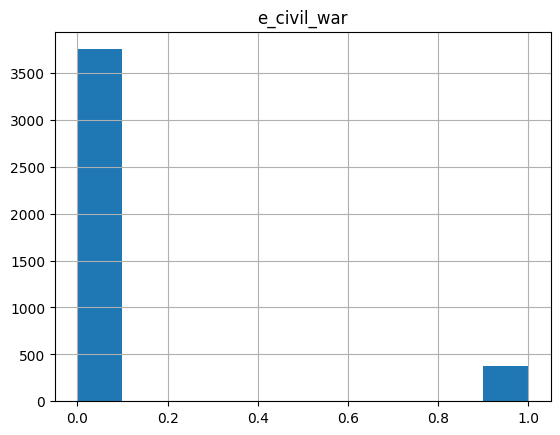

In [121]:
#visualising distriubtion of classes
y.hist()